In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None
import plotly.graph_objects as go
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [121]:
tab = pd.read_csv("data_table.csv")
print(tab.shape)
tab.drop_duplicates(subset = ['name','date'],keep = 'first',inplace=True)
print(tab.shape)
tab.head()

(13901, 20)
(13891, 20)


league             club        name_x          name country_of_birth  \
0    EPL  Manchester City  riyad-mahrez  Riyad Mahrez           France   
1    EPL  Manchester City  riyad-mahrez  Riyad Mahrez           France   
2    EPL  Manchester City  riyad-mahrez  Riyad Mahrez           France   
3    EPL  Manchester City  riyad-mahrez  Riyad Mahrez           France   
4    EPL  Manchester City  riyad-mahrez  Riyad Mahrez           France   

  date_of_birth position           sub_position  foot  date  market_value  \
0     2/21/1991   Attack  attack - Right Winger  Left  2013        675000   
1     2/21/1991   Attack  attack - Right Winger  Left  2014       1800000   
2     2/21/1991   Attack  attack - Right Winger  Left  2015       6300000   
3     2/21/1991   Attack  attack - Right Winger  Left  2016      27000000   
4     2/21/1991   Attack  attack - Right Winger  Left  2017      27000000   

   Apps  Mins  Goals  Assists  Yel  Red  MotM  Rating  age  
0    19  1163      3        4    0    0     1    7.21   22  
1    31  2155      4        3    0    0     2    7.14   23  
2    41  3299     18       12    1    0    10    7.72   24  
3    45  3613     10        5    5    0     5    7.01   25  
4    36  2961     12       10    2    0     5    7.28   26

C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    13891.000000
mean         9.342428
std         13.982631
min          0.023000
25%          1.350000
50%          4.500000
75%         10.800000
max        180.000000
Name: market_value, dtype: float64

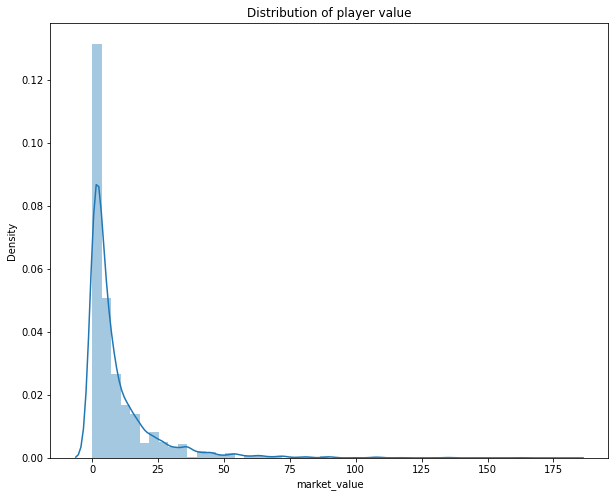

In [122]:
def plot_distribution_and_boxplot(column, name):
    # distribution
    plt.figure(figsize = (10, 8))
    plt.title('Distribution of ' + name)
    sns.distplot(column, kde=True)
    
    # box plot
    fig = go.Figure()
    fig.add_trace(go.Box( y = column, name = 'Boxplot of ' + name,
                marker_color = 'indianred'))
    fig.show()
    
    display(column.describe())
    
plot_distribution_and_boxplot(tab['market_value'] / 1_000_000, 'player value')

C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='market_value', ylabel='Density'>

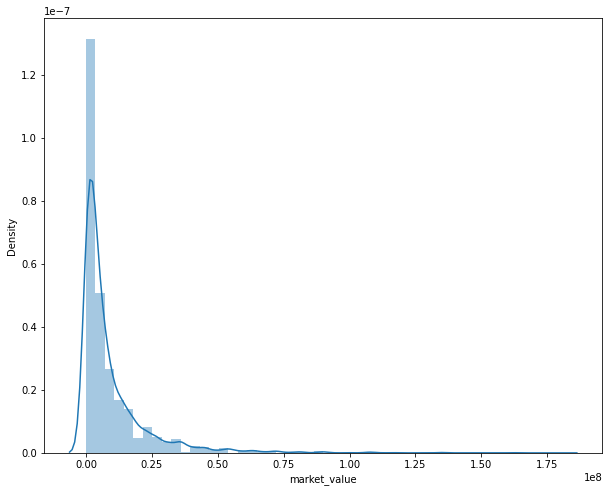

In [123]:
plt.figure(figsize=(10,8))
sns.distplot(tab['market_value'])

In [126]:
tab["log_market_value"] = np.log(tab["market_value"])

C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_market_value', ylabel='Density'>

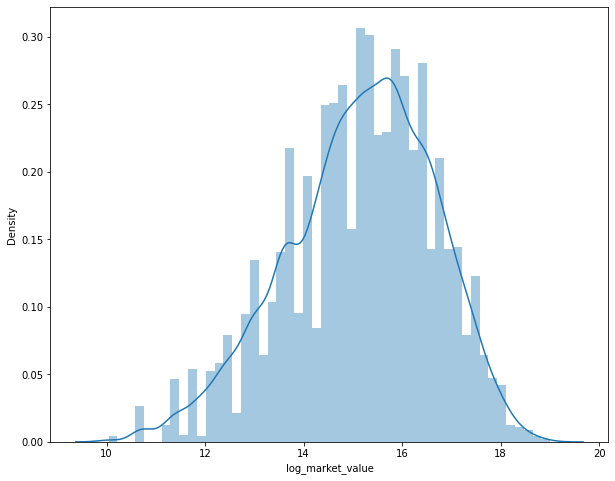

In [48]:
plt.figure(figsize=(10,8))
sns.distplot(tab['log_market_value'])

C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    13891.000000
mean        15.146402
std          1.497057
min         10.043249
25%         14.115615
50%         15.319588
75%         16.195057
max         19.008467
Name: log_market_value, dtype: float64

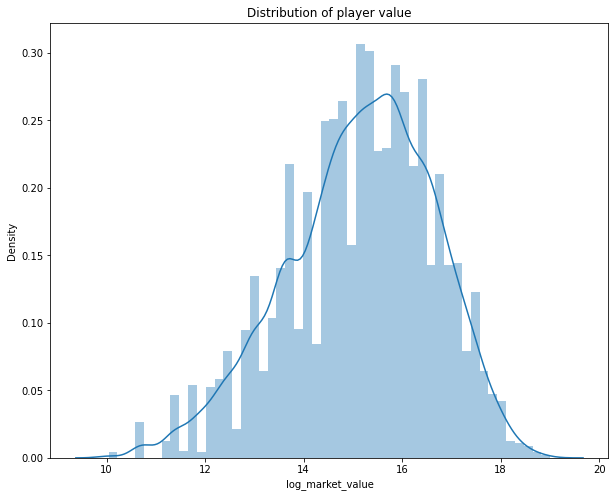

In [128]:
plot_distribution_and_boxplot(tab['log_market_value'], 'player value')

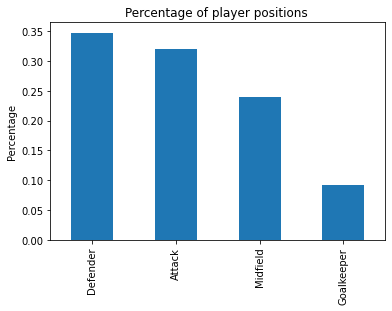

In [49]:
tab['position'].value_counts(normalize=True).plot(kind='bar')
plt.title("Percentage of player positions ")
plt.ylabel("Percentage")
plt.show()

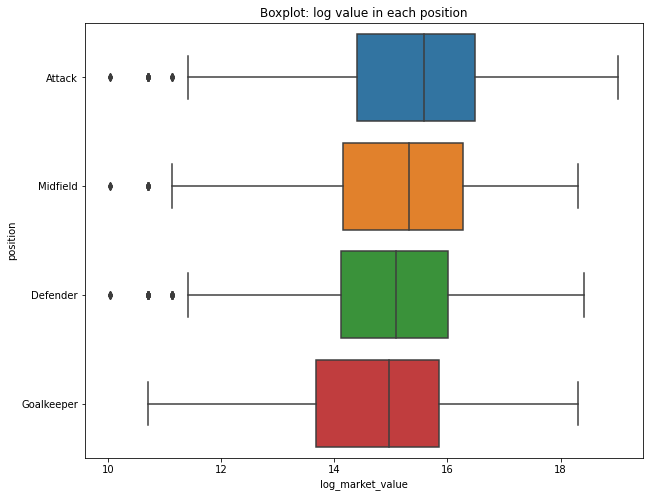

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(x='log_market_value',y='position',data=tab)
plt.title("Boxplot: log value in each position")
plt.show()

In [73]:
data = pd.concat((tab.iloc[:,6],tab.iloc[:,8],tab.iloc[:,-10:]),axis = 1)
data.head()

position  foot  Apps  Mins  Goals  Assists  Yel  Red  MotM  Rating  age  \
0   Attack  Left    19  1163      3        4    0    0     1    7.21   22   
1   Attack  Left    31  2155      4        3    0    0     2    7.14   23   
2   Attack  Left    41  3299     18       12    1    0    10    7.72   24   
3   Attack  Left    45  3613     10        5    5    0     5    7.01   25   
4   Attack  Left    36  2961     12       10    2    0     5    7.28   26   

   log_market_value  
0         13.422468  
1         14.403297  
2         15.656060  
3         17.111347  
4         17.111347

In [74]:
data = data.drop(columns=['Yel','Red'])

<AxesSubplot:>

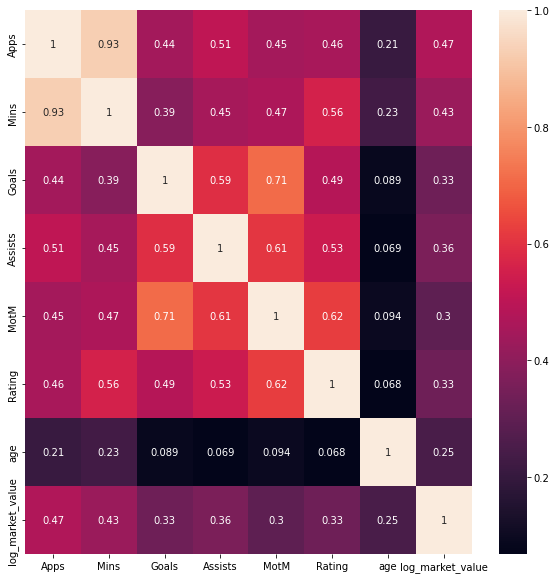

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

In [75]:
data = data.dropna()

In [76]:
X = data.drop(columns=['log_market_value']).iloc[:,2:]

In [78]:
scaled = X.copy()
cols = list(scaled)
scaled

Apps  Mins  Goals  Assists  MotM  Rating  age
0        19  1163      3        4     1    7.21   22
1        31  2155      4        3     2    7.14   23
2        41  3299     18       12    10    7.72   24
3        45  3613     10        5     5    7.01   25
4        36  2961     12       10     5    7.28   26
...     ...   ...    ...      ...   ...     ...  ...
13896    23  1775      0        0     0    6.56   22
13897    12  1025      2        1     0    6.91   23
13898    32  2741      1        2     1    6.97   24
13899    33  2838      7        8     1    7.23   25
13900    27  2110      0        3     0    6.40   26

[13860 rows x 7 columns]

In [79]:
scaled = StandardScaler().fit_transform(scaled)
X[cols] = scaled
X

Apps      Mins     Goals   Assists      MotM    Rating       age
0     -0.511649 -0.609954  0.000574  0.668910 -0.092989  1.276513 -0.630289
1      0.428872  0.276871  0.194487  0.324349  0.410263  1.081002 -0.381321
2      1.212640  1.299580  2.909277  3.425395  4.436280  2.700954 -0.132352
3      1.526147  1.580288  1.357968  1.013471  1.920019  0.717909  0.116616
4      0.820756  0.997416  1.745796  2.736274  1.920019  1.472025  0.365585
...         ...       ...       ...       ...       ...       ...       ...
13896 -0.198142 -0.062840 -0.581167 -0.709332 -0.596241 -0.538950 -0.630289
13897 -1.060286 -0.733323 -0.193340 -0.364772 -0.596241  0.438607 -0.381321
13898  0.507249  0.800741 -0.387253 -0.020211 -0.092989  0.606188 -0.132352
13899  0.585626  0.887457  0.776228  2.047152 -0.092989  1.332374  0.116616
13900  0.115365  0.236642 -0.581167  0.324349 -0.596241 -0.985833  0.365585

[13860 rows x 7 columns]

In [80]:
data[cols] = X
data

position   foot      Apps      Mins     Goals   Assists      MotM  \
0        Attack   Left -0.511649 -0.609954  0.000574  0.668910 -0.092989   
1        Attack   Left  0.428872  0.276871  0.194487  0.324349  0.410263   
2        Attack   Left  1.212640  1.299580  2.909277  3.425395  4.436280   
3        Attack   Left  1.526147  1.580288  1.357968  1.013471  1.920019   
4        Attack   Left  0.820756  0.997416  1.745796  2.736274  1.920019   
...         ...    ...       ...       ...       ...       ...       ...   
13896  Midfield  Right -0.198142 -0.062840 -0.581167 -0.709332 -0.596241   
13897  Midfield  Right -1.060286 -0.733323 -0.193340 -0.364772 -0.596241   
13898  Midfield  Right  0.507249  0.800741 -0.387253 -0.020211 -0.092989   
13899  Midfield  Right  0.585626  0.887457  0.776228  2.047152 -0.092989   
13900  Midfield  Right  0.115365  0.236642 -0.581167  0.324349 -0.596241   

         Rating       age  log_market_value  
0      1.276513 -0.630289         13.422468  
1      1.081002 -0.381321         14.403297  
2      2.700954 -0.132352         15.656060  
3      0.717909  0.116616         17.111347  
4      1.472025  0.365585         17.111347  
...         ...       ...               ...  
13896 -0.538950 -0.630289         14.403297  
13897  0.438607 -0.381321         13.710150  
13898  0.606188 -0.132352         13.710150  
13899  1.332374  0.116616         13.892472  
13900 -0.985833  0.365585         14.626441  

[13860 rows x 10 columns]

In [81]:
data = data.join(pd.get_dummies(data["position"]))
data = data.join(pd.get_dummies(data["foot"]))
data.head()

position  foot      Apps      Mins     Goals   Assists      MotM    Rating  \
0   Attack  Left -0.511649 -0.609954  0.000574  0.668910 -0.092989  1.276513   
1   Attack  Left  0.428872  0.276871  0.194487  0.324349  0.410263  1.081002   
2   Attack  Left  1.212640  1.299580  2.909277  3.425395  4.436280  2.700954   
3   Attack  Left  1.526147  1.580288  1.357968  1.013471  1.920019  0.717909   
4   Attack  Left  0.820756  0.997416  1.745796  2.736274  1.920019  1.472025   

        age  log_market_value  Attack  Defender  Goalkeeper  Midfield  Both  \
0 -0.630289         13.422468       1         0           0         0     0   
1 -0.381321         14.403297       1         0           0         0     0   
2 -0.132352         15.656060       1         0           0         0     0   
3  0.116616         17.111347       1         0           0         0     0   
4  0.365585         17.111347       1         0           0         0     0   

   Left  Right  
0     1      0  
1     1      0  
2     1      0  
3     1      0  
4     1      0

In [82]:
data = data.drop(columns=['position','foot'])

In [83]:
data

Apps      Mins     Goals   Assists      MotM    Rating       age  \
0     -0.511649 -0.609954  0.000574  0.668910 -0.092989  1.276513 -0.630289   
1      0.428872  0.276871  0.194487  0.324349  0.410263  1.081002 -0.381321   
2      1.212640  1.299580  2.909277  3.425395  4.436280  2.700954 -0.132352   
3      1.526147  1.580288  1.357968  1.013471  1.920019  0.717909  0.116616   
4      0.820756  0.997416  1.745796  2.736274  1.920019  1.472025  0.365585   
...         ...       ...       ...       ...       ...       ...       ...   
13896 -0.198142 -0.062840 -0.581167 -0.709332 -0.596241 -0.538950 -0.630289   
13897 -1.060286 -0.733323 -0.193340 -0.364772 -0.596241  0.438607 -0.381321   
13898  0.507249  0.800741 -0.387253 -0.020211 -0.092989  0.606188 -0.132352   
13899  0.585626  0.887457  0.776228  2.047152 -0.092989  1.332374  0.116616   
13900  0.115365  0.236642 -0.581167  0.324349 -0.596241 -0.985833  0.365585   

       log_market_value  Attack  Defender  Goalkeeper  Midfield  Both  Left  \
0             13.422468       1         0           0         0     0     1   
1             14.403297       1         0           0         0     0     1   
2             15.656060       1         0           0         0     0     1   
3             17.111347       1         0           0         0     0     1   
4             17.111347       1         0           0         0     0     1   
...                 ...     ...       ...         ...       ...   ...   ...   
13896         14.403297       0         0           0         1     0     0   
13897         13.710150       0         0           0         1     0     0   
13898         13.710150       0         0           0         1     0     0   
13899         13.892472       0         0           0         1     0     0   
13900         14.626441       0         0           0         1     0     0   

       Right  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
13896      1  
13897      1  
13898      1  
13899      1  
13900      1  

[13860 rows x 15 columns]

In [85]:
y = data["log_market_value"]
X = data.drop(columns=['log_market_value'])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.25, random_state = 30 )

# get error

In [89]:
def get_error(y_true,y_pred):
    print(f'MAE: {mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true,y_pred,squared=False)}')
    print(f'R2: {r2_score(y_true,y_pred)}')

# KNN

In [95]:
regressor =  KNeighborsRegressor()
params = {'n_neighbors':range(1,15) , 'weights' : ['uniform', 'distance'], 
          'metric' : ['euclidean','manhattan','minkowski','chebyshev']}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': range(1, 15),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=1)

In [96]:
grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 14,
 'p': 2,
 'weights': 'distance'}

In [98]:
KNR = KNeighborsRegressor(n_neighbors = 14, metric = 'euclidean', weights = 'distance')
KNR.fit(X_train, y_train)
y_pred = KNR.predict(X_test)
get_error(y_test,y_pred)

MAE: 0.9761760879690392
RMSE: 1.2243742989596793
R2: 0.3282578528162219


# DesTree - RF

In [129]:
data = pd.concat((tab.iloc[:,6],tab.iloc[:,8],tab.iloc[:,-10:]),axis = 1)
data.head()

position  foot  Apps  Mins  Goals  Assists  Yel  Red  MotM  Rating  age  \
0   Attack  Left    19  1163      3        4    0    0     1    7.21   22   
1   Attack  Left    31  2155      4        3    0    0     2    7.14   23   
2   Attack  Left    41  3299     18       12    1    0    10    7.72   24   
3   Attack  Left    45  3613     10        5    5    0     5    7.01   25   
4   Attack  Left    36  2961     12       10    2    0     5    7.28   26   

   log_market_value  
0         13.422468  
1         14.403297  
2         15.656060  
3         17.111347  
4         17.111347

In [130]:
data = data.drop(columns=['Yel','Red']).dropna()
y = data["log_market_value"]
X = data.drop(columns=['log_market_value'])
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.25, random_state = 30 )

In [131]:
regressor = DecisionTreeRegressor()
params = {'max_depth':range(4,20),
         'criterion' :['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'max_features': [None, 0.5,1.0, 'sqrt','log2'],
          'min_samples_leaf':[1, 2,4] }
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=5, verbose= 5 )
grid.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV 1/5] END criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=2;, score

[CV 5/5] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_

[CV 3/5] END criterion=squared_error, max_depth=6, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=6, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=6, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=6, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=6, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=6, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=6, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=6, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=

[CV 3/5] END criterion=squared_error, max_depth=7, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=7, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=7, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, ma

[CV 2/5] END criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, ma

[CV 2/5] END criterion=squared_error, max_depth=9, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=9, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=9, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=9, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=9, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=9, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=9, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=9, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, ma

[CV 3/5] END criterion=squared_error, max_depth=11, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=11, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=11, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=11, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=11, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=11, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=11, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=11, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error,

[CV 3/5] END criterion=squared_error, max_depth=12, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=12, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=12, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=12, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=12, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=12, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=12, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=12, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_e

[CV 4/5] END criterion=squared_error, max_depth=13, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=13, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=13, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=13, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=13, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=13, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=13, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=13, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, ma

[CV 3/5] END criterion=squared_error, max_depth=14, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=14, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=14, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_e

[CV 4/5] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=16, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_e

[CV 5/5] END criterion=squared_error, max_depth=17, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=17, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=17, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=17, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=17, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=17, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=17, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=17, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, ma

[CV 5/5] END criterion=squared_error, max_depth=18, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=18, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=18, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, m

[CV 1/5] END criterion=squared_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=19, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=19, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=19, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, ma

[CV 5/5] END criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=4

[CV 2/5] END criterion=friedman_mse, max_depth=6, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=6, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=6, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=6, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=6, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=6, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=6, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=6, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=6

[CV 2/5] END criterion=friedman_mse, max_depth=7, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=7, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=7, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=7, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=7, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=7, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=7, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=7, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=7, max_fe

[CV 5/5] END criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=8

[CV 5/5] END criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=10, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=10, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=10, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=10, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=10, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=10, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=10, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_

[CV 1/5] END criterion=friedman_mse, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=11, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=11, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=11, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=1

[CV 4/5] END criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max

[CV 5/5] END criterion=friedman_mse, max_depth=13, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=14, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=14, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max

[CV 4/5] END criterion=friedman_mse, max_depth=15, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=15, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=15, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth

[CV 5/5] END criterion=friedman_mse, max_depth=16, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=16, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=16, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=16, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=16, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=16, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=16, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=16, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=1

[CV 3/5] END criterion=friedman_mse, max_depth=17, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=17, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=17, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=17, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=17, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=17, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=17, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=17, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max

[CV 5/5] END criterion=friedman_mse, max_depth=19, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=19, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=19, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=19, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=19, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=19, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=19, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=19, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max

[CV 2/5] END criterion=absolute_error, max_depth=4, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=4, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=4, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=4, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=4, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=4, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=4, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=4, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, m

[CV 4/5] END criterion=absolute_error, max_depth=5, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=5, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=5, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=5, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=5, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=5, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=5, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, 

[CV 3/5] END criterion=absolute_error, max_depth=6, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=6, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=6, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=6, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=6, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=6, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=6, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=6, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_

[CV 1/5] END criterion=absolute_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=7, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=7, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=7, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=7, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_

[CV 5/5] END criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=9, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=9, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_

[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=absol

[CV 5/5] END criterion=absolute_error, max_depth=11, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=11, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=11, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=11, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_

[CV 4/5] END criterion=absolute_error, max_depth=12, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=12, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=12, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=12, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=12, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=12, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=12, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=12, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_

[CV 1/5] END criterion=absolute_error, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=13, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=13, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=13, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=a

[CV 5/5] END criterion=absolute_error, max_depth=14, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=14, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=14, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=14, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=14, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=14, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=14, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=14, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=a

[CV 4/5] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=16, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=a

[CV 5/5] END criterion=absolute_error, max_depth=16, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=17, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=17, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=17, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=17, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=17, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=17, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=17, max_features=None, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=a

[CV 3/5] END criterion=absolute_error, max_depth=18, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=18, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=18, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=18, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolu

[CV 5/5] END criterion=absolute_error, max_depth=19, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, max_depth=19, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=19, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, max_depth=19, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_

[CV 1/5] END criterion=poisson, max_depth=4, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=4, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=4, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=4, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=4, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=4, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=4, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=4, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=4, max_features=1.0, min_samples_leaf=4;, score=nan to

[CV 4/5] END criterion=poisson, max_depth=5, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=5, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=2;, score

[CV 4/5] END criterion=poisson, max_depth=6, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=6, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=6, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=6, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=6, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=6, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=6, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=6, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=6, max_features=log2, min_samples_leaf=1;, sco

[CV 3/5] END criterion=poisson, max_depth=7, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=7, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=7, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=8, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=8, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=8, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=8, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=8, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=8, max_features=None, min_samples_leaf=2;, sco

[CV 4/5] END criterion=poisson, max_depth=9, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=9, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=9, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=9, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=9, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=9, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=9, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=9, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=9, max_features=0.5, min_samples_leaf=4;, score=nan to

[CV 2/5] END criterion=poisson, max_depth=10, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=10, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=10, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=10, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=10, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=10, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=10, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=10, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=10, max_features=1.0, min_samples_leaf=2;, sco

[CV 2/5] END criterion=poisson, max_depth=11, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=11, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=11, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=11, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=11, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=11, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=11, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=11, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=11, max_features=sqrt, min_samples_leaf=1;

[CV 2/5] END criterion=poisson, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=12, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=12, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=12, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=12, max_features=log2, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=12, max_features=log2, min_samples_lea

[CV 5/5] END criterion=poisson, max_depth=13, max_features=log2, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=13, max_features=log2, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=14, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=14, max_features=None, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=14, max_features=None, min_samples_lea

[CV 4/5] END criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=15, max_features=0.5, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=15, max_features=0.5, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=15, max_features=0.5, min_samples_leaf=2;, s

[CV 1/5] END criterion=poisson, max_depth=16, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=16, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=16, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=16, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=16, max_features=0.5, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=16, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=16, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=16, max_features=1.0, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=16, max_features=1.0, min_samples_leaf=1;, sco

[CV 2/5] END criterion=poisson, max_depth=17, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=17, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=17, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=17, max_features=1.0, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=17, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=17, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=17, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=17, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=17, max_features=1.0, min_samples_leaf=4;, sco

[CV 2/5] END criterion=poisson, max_depth=18, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=18, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=18, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=18, max_features=1.0, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=18, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=18, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=18, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=18, max_features=sqrt, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=18, max_features=sqrt, min_samples_leaf=1;

[CV 3/5] END criterion=poisson, max_depth=19, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=19, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=19, max_features=sqrt, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=19, max_features=log2, min_samples_lea

ValueError: 
All the 4800 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 172, in fit
    X, y = self._validate_data(
  File "C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 591, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py", line 1899, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Defender'


In [ ]:
grid.best_estimator_.get_params()

In [107]:
DT = DecisionTreeRegressor(max_depth = 6,criterion = 'poisson', min_samples_leaf= 4, max_features= 1.0)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
get_error(y_test,y_pred)

MAE: 0.9666642702187244
RMSE: 1.2111763553316601
R2: 0.34266167078451026


In [111]:
regressor = RandomForestRegressor()
params = {'n_estimators':[300,500],
         'max_features': [None, 0.5,1.0, 'sqrt'],
          'min_samples_leaf':[1,4]
         }
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=5, verbose= 5 )
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_features=None, min_samples_leaf=1, n_estimators=300;, score=-1.430 total time=  10.4s
[CV 2/5] END max_features=None, min_samples_leaf=1, n_estimators=300;, score=-1.465 total time=  10.6s
[CV 3/5] END max_features=None, min_samples_leaf=1, n_estimators=300;, score=-1.424 total time=  10.4s
[CV 4/5] END max_features=None, min_samples_leaf=1, n_estimators=300;, score=-1.427 total time=  10.3s
[CV 5/5] END max_features=None, min_samples_leaf=1, n_estimators=300;, score=-1.501 total time=  10.9s
[CV 1/5] END max_features=None, min_samples_leaf=1, n_estimators=500;, score=-1.430 total time=  18.7s
[CV 2/5] END max_features=None, min_samples_leaf=1, n_estimators=500;, score=-1.463 total time=  18.6s
[CV 3/5] END max_features=None, min_samples_leaf=1, n_estimators=500;, score=-1.419 total time=  16.8s
[CV 4/5] END max_features=None, min_samples_leaf=1, n_estimators=500;, score=-1.426 total time=  16.7s
[CV 5/5] END

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [None, 0.5, 1.0, 'sqrt'],
                         'min_samples_leaf': [1, 4],
                         'n_estimators': [300, 500]},
             scoring='neg_mean_squared_error', verbose=5)

In [112]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [113]:
RF = RandomForestRegressor(n_estimators = 500, min_samples_leaf= 4, max_features= 0.5)
RF.fit(X_train, y_train)
y_pred = DT.predict(X_test)
get_error(y_test,y_pred)

MAE: 0.9666642702187244
RMSE: 1.2111763553316601
R2: 0.34266167078451026
